## 1. Tensor 와 그래프 실행

In [15]:
import tensorflow as tf

In [14]:
from IPython.display import Image

In [16]:
hello = tf.constant('Hello, Tensorflow')
print(hello)

Tensor("Const_3:0", shape=(), dtype=string)


In [17]:
## 1. 그래프 생성
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)
print(c)

Tensor("Add_2:0", shape=(), dtype=int32)


In [18]:
## 2. 그래프 실행(실제 연산이 이루어 지는 곳)
sess = tf.Session()
print(sess.run(hello))
print(sess.run([a,b,c]))
sess.close()

b'Hello, Tensorflow'
[10, 32, 42]


## placeholder와 변수

In [19]:
X = tf.placeholder(tf.float32, [None, 3])
print(X)

Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)


In [20]:
x_data = [[1,2,3], [4,5,6]]

In [21]:
W = tf.Variable(tf.random.normal([3,2]))
b = tf.Variable(tf.random.normal([2,1]))

In [22]:
## 행렬곱
expr = tf.matmul(X,W) + b

In [23]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('=== x_data ===')
print(x_data)
print('=== W ===')
print(sess.run(W))
print('=== b ===')
print(sess.run(b))

=== x_data ===
[[1, 2, 3], [4, 5, 6]]
=== W ===
[[-0.5959909   1.24901   ]
 [ 2.157033   -0.61255056]
 [-0.8887939   0.7444809 ]]
=== b ===
[[ 1.674644  ]
 [-0.74230653]]


#### 행렬곱 계산

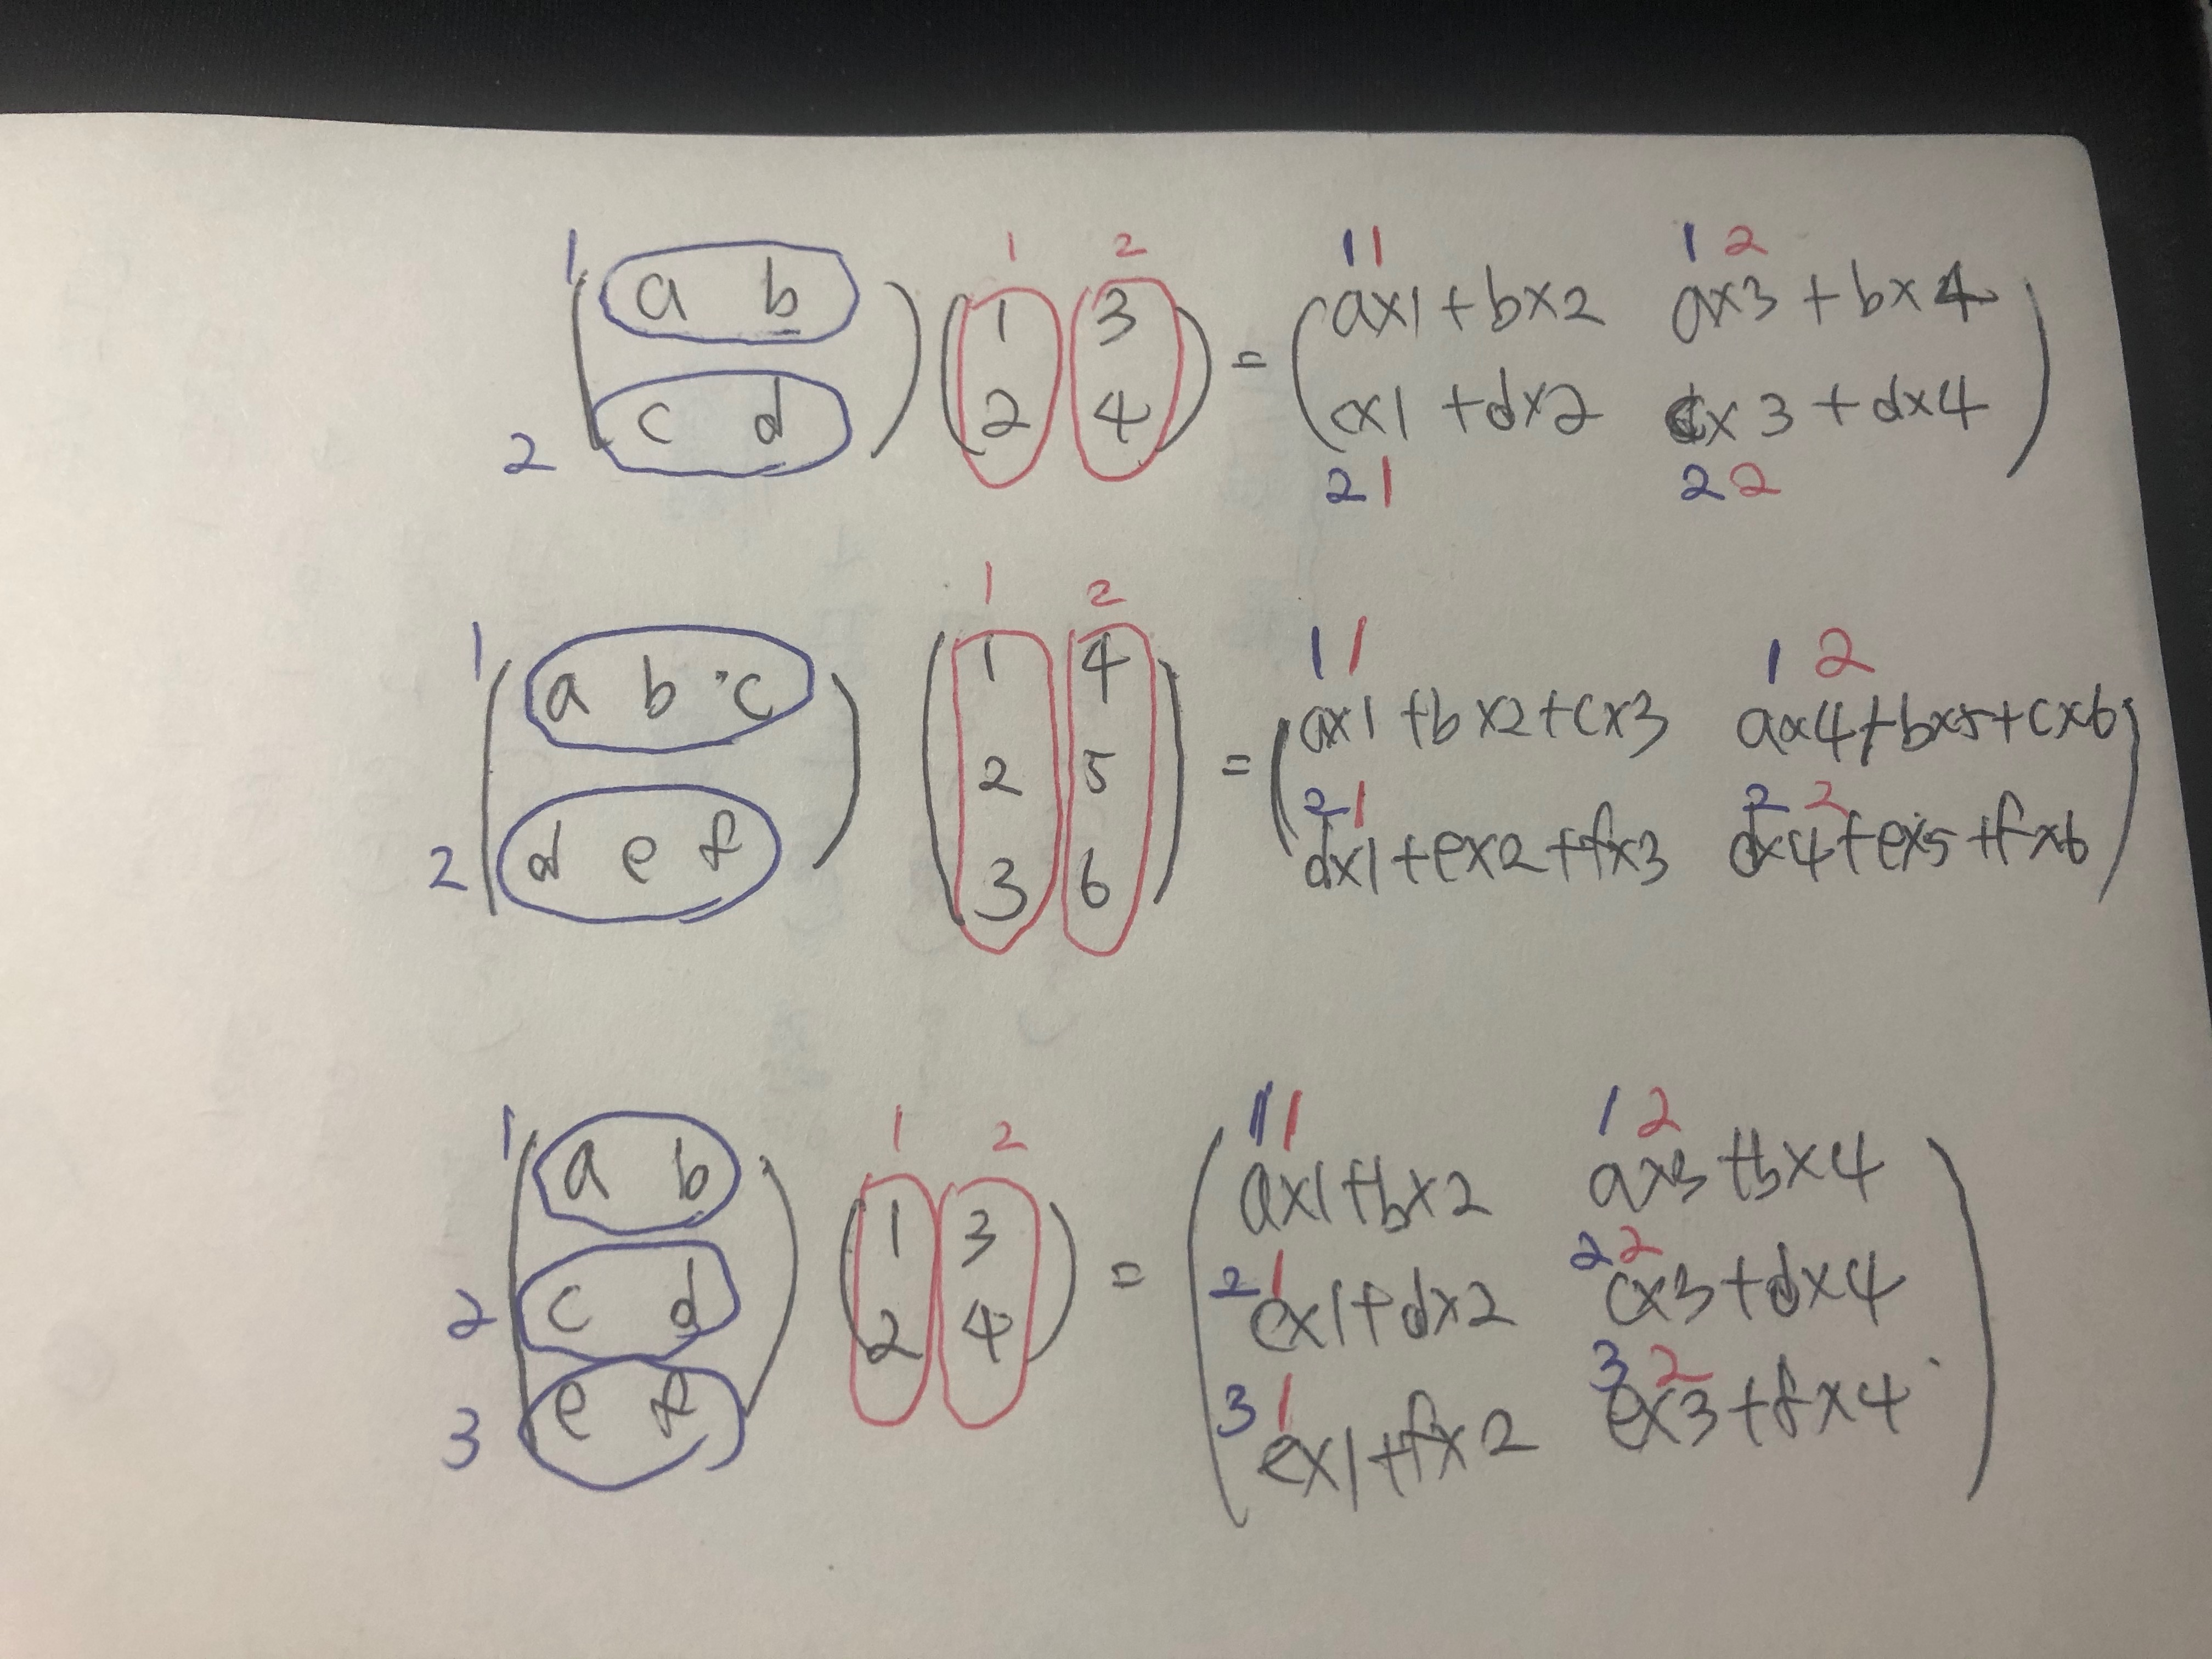

In [24]:
Image("IMG_0538.jpg")

## 선형 회귀 모델 구현하기

주어진 x와 y값을 가지고 서로 간의 관계를 파악

In [25]:
# data
x_data = [1,2,3]
y_data = [1,2,3]

In [26]:
# W,b를 -1 ~ 1 사이의 균등분포로 초기화
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

In [27]:
# placeholder 이름 부여
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [28]:
hypothesis = W * X + b

손실함수
- 한 쌍의 데이터에 대한 손실값을 계산하는 함수
- 손실값은 실제값과 모델로 예측한 값의 차이를 나타내는 값(작을수록 모델이 X와 Y의 상관관계를 잘 설명하고 있다는 뜻)

In [29]:
# 손실값 (예측값 - 실제값)
cost = tf.reduce_mean(tf.square(hypothesis - Y))

학습률(learning_rate)
- 학습을 얼마나 '급하게' 할 것인가를 설정하는 값
- 값이 너무 크면 손실값을 찾지 못하고 지나치게 되고, 값이 너무 작으면 학습 속도가 느려짐

In [31]:
# 경사하강법 최적화 함수(손실값을 최소화 하는 방법)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 100번 학습
    for step in range(100):
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, sess.run(W), sess.run(b))
    
    print('X: 5, Y:', sess.run(hypothesis, feed_dict={X:5}))
    print('X: 2.5, Y:', sess.run(hypothesis, feed_dict={X: 2.5}))

0 5.5718627 [0.8820653] [0.53923845]
1 0.10130518 [0.7764423] [0.47856465]
2 0.034307737 [0.79367024] [0.47227478]
3 0.03193527 [0.7973348] [0.46035174]
4 0.030409455 [0.80234826] [0.44934747]
5 0.028964885 [0.8070842] [0.43853867]
6 0.027589044 [0.8117235] [0.42799723]
7 0.026278524 [0.8162493] [0.4177084]
8 0.025030307 [0.8206666] [0.40766698]
9 0.02384133 [0.82497764] [0.39786693]
10 0.022708854 [0.82918507] [0.38830248]
11 0.021630151 [0.8332913] [0.37896794]
12 0.020602718 [0.83729887] [0.36985782]
13 0.019624064 [0.8412101] [0.3609667]
14 0.018691909 [0.8450273] [0.35228932]
15 0.017804053 [0.8487528] [0.34382054]
16 0.016958313 [0.8523886] [0.33555532]
17 0.016152794 [0.8559371] [0.3274888]
18 0.0153855095 [0.8594002] [0.31961617]
19 0.014654708 [0.8627802] [0.31193286]
20 0.013958595 [0.86607885] [0.3044342]
21 0.013295543 [0.8692982] [0.2971158]
22 0.012664001 [0.8724402] [0.28997335]
23 0.012062465 [0.8755067] [0.28300261]
24 0.01148947 [0.8784994] [0.2761994]
25 0.010943733 